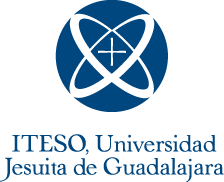

<center><font color=#555555><font size=6> MAF1731 - Microstructure and Trading Systems </font> <br> <br>
    
<center><font color=#555555><font size=5> B.Eng Financial Engineering </font> <br> <br> <br> <br>
   
<center> <font color= #555555> <font size = Feb 2023 </a> | <font color= #555555> <font size = 4> Repository: <a href='https://github.com/anamaria1404/Laboratorio-I'>Link</a></font>

<hr style="border:0.02in solid gray"> </hr>

<center> <font color= #555555> <font size = 6> Laboratorio I </font> <br> <br> <font color= #555555> <font size = 5> Inversión de Capital  </font>

<hr style="border:0.02in solid gray"> </hr>

<center> Ana María Aguilera Gómez

<center> Galilea de la Torre Rojas

# <font color= #6B6B6B> <font size = 6> 1. Introduction </font>

<hr style="border:0.02in solid gray"> </hr>

Poder responder la pregunta **¿Qué estrategia de inversión propondrías si tu trabajo fuera invertir 1 Millón de pesos?**

- Caso: Tienes 1 Millón de pesos, tienes dos opciones para invertirlos. Por un lado, puedes hacer una Inversión Pasiva del capital, comprando el 100% del capital de títulos de un ETF que replica al mercado de renta variable mexicano S&P/BMV IPC que es el NAFTRAC. Pero por otro lado, puedes hacer una Inversión Activa del capital, al crear un portafolio que tenga los mismos activos que el ETF y haciendo el rebalanceo por medio de un algoritmo en específico.


<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> 2. Objectives </font>



<hr style="border:0.02in solid gray"> </hr>


# <font color= #6B6B6B> 3. Install/Load Packages and Depedencies </font>

## <font color= #6B6B6B> 3.1 Python Packages </font> <font color= #555555>
    
In order to run this notebook, it is necessary to have installed and/or have the _requirements.txt_ file with the following: 
    
- pandas>=1.1.1
- numpy>=1.19.1
- jupyter>=1.0.0
- yfinance>=0.1.55
- DateTime>=4.3
- statistics>=1.0.3.5
- matplotlib>=3.3.4

## <font color= #6B6B6B> 3.2 Files Dependencies </font> <font color= #555555>
    
The following are the file dependencies that are needed to run this notebook:
    
- files/NAFTRAC_.csv

## <font color= #6E6E6E> 3.3 Install and load Packages</font>

In [171]:
# Main functionali
#import main

<hr style="border:0.02in solid gray"> </hr>


# <font color= #6E6E6E> 4. Passive Investment Strategy</font>


## <font color= #6E6E6E> 4.1 Data and process</font>


In [262]:
def replace_text(x, to_replace, replacement):
        try:
            x=x.replace(to_replace, replacement)
        except:
            pass
        return x

In [263]:
df = pd.read_csv('files/NAFTRAC_20210129.csv',skiprows=2)
df2 = pd.read_csv('files/NAFTRAC_20210226.csv',skiprows=2)
df3 = pd.read_csv('files/NAFTRAC_20210331.csv',skiprows=2)
df4 = pd.read_csv('files/NAFTRAC_20210430.csv',skiprows=2)
df5 = pd.read_csv('files/NAFTRAC_20210531.csv',skiprows=2)
df6 = pd.read_csv('files/NAFTRAC_20210630.csv',skiprows=2)
df7 = pd.read_csv('files/NAFTRAC_20210730.csv',skiprows=2)
df8 = pd.read_csv('files/NAFTRAC_20210831.csv',skiprows=2)
df9 = pd.read_csv('files/NAFTRAC_20210930.csv',skiprows=2)
df10 = pd.read_csv('files/NAFTRAC_20211026.csv',skiprows=2)
df11 = pd.read_csv('files/NAFTRAC_20211130.csv',skiprows=2)
df12 = pd.read_csv('files/NAFTRAC_20211231.csv',skiprows=2)
df13 = pd.read_csv('files/NAFTRAC_20220126.csv',skiprows=2)
df14 = pd.read_csv('files/NAFTRAC_20220228.csv',skiprows=2)
df15 = pd.read_csv('files/NAFTRAC_20220331.csv',skiprows=2)
df16 = pd.read_csv('files/NAFTRAC_20220429.csv',skiprows=2)
df17 = pd.read_csv('files/NAFTRAC_20220531.csv',skiprows=2)
df18 = pd.read_csv('files/NAFTRAC_20220630.csv',skiprows=2)
df19 = pd.read_csv('files/NAFTRAC_20220729.csv',skiprows=2)
df20 = pd.read_csv('files/NAFTRAC_20220831.csv',skiprows=2)
df21 = pd.read_csv('files/NAFTRAC_20220930.csv',skiprows=2)
df22 = pd.read_csv('files/NAFTRAC_20221031.csv',skiprows=2)
df23 = pd.read_csv('files/NAFTRAC_20221130.csv',skiprows=2)
df24 = pd.read_csv('files/NAFTRAC_20221230.csv',skiprows=2)
df25 = pd.read_csv('files/NAFTRAC_20230125.csv',skiprows=2)

vertical_concat = pd.concat([df, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12,df13,df14,df15,df16,df17,df18,df19,df20,df21,
                                 df22,df23,df24,df25], axis=0).drop(37) #eliminar última fila vacía

In [264]:
#import data
import pandas as pd
import yfinance as yf
import numpy as np

In [265]:
# obtener tickers repetidos
cant = vertical_concat.groupby(['Ticker'])['Ticker'].count().to_frame()
cant24 = cant[cant['Ticker'] == 25] #tickers repetidos 25 veces

#pesos del mes 1
pesos1 = df[['Ticker','Peso (%)']]

pesos1["Peso (%)"] = pesos1["Peso (%)"] / 100

pesos1 = pesos1.drop(37) #eliminar última fila vacía


<ipython-input-265-213705033aad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pesos1["Peso (%)"] = pesos1["Peso (%)"] / 100


In [266]:
pesos1.Ticker = pesos1.Ticker.apply(replace_text, args=('*',''))
pesos1.Ticker = pesos1.Ticker.apply(replace_text, args=(".", "-"))
pesos1.Ticker = pesos1.Ticker + '.MX'
pesos1.set_index("Ticker", inplace = True)
pesos1=pesos1.T
pesos1.drop(['MXN.MX','GENTERA.MX','IENOVA.MX','LABB.MX','NMKA.MX','SITESB-1.MX'],axis=1, inplace=True) #eliminar MXN y no repetidas

In [267]:
#tickers limpieza 
t = pd.DataFrame(cant24.index)
t.Ticker = t.Ticker.apply(replace_text, args=('*',''))
t.Ticker = t.Ticker.apply(replace_text, args=(".", "-"))
t.Ticker = t.Ticker + '.MX'
t=t.drop(23,axis=0) #Eliminamos MXN

In [268]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date, end_date):
    # Descargamos DataFrame con todos los datos
    closes = yf.download(tickers = tickers,start=start_date,end=end_date)['Adj Close']
    closes.reset_index(inplace = True)
    closes = closes.groupby([closes["Date"].dt.year, closes["Date"].dt.month], as_index=False).last()
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    closes.set_index("Date", inplace = True)
    return closes

In [269]:
# Importar datos
names = t.Ticker.values.tolist()
start = '2021-01-31'
end = '2023-01-25'

In [270]:
# Obtener precios mensuales
closes = get_adj_closes(tickers=names, start_date=start, end_date=end)

[*********************100%***********************]  31 of 31 completed


In [279]:
def pasiva( tickers,precios,capital, comision):
    
    tabla = pd.DataFrame(index = precios.columns, columns = ["Títulos", "Comisión","Costo Total","Ponderación"]) 
    
    for ticker in precios.columns:
        tabla.at[ticker, "Títulos"] = np.floor((capital * tickers[ticker].values[0]) / (precios[ticker][0] * (1 + comision)))
        tabla.at[ticker, "Comisión"] = tabla.loc[ticker, "Títulos"] * precios[ticker][0] * comision
        tabla.at[ticker, "Costo Total"] = tabla.loc[ticker, "Títulos"] * precios[ticker][0] * (1 + comision)
        tabla.at[ticker, "Ponderación"] = (tabla.loc[ticker, "Títulos"] * precios[ticker][0]) / capital
     
    df_pasiva = pd.DataFrame(index = precios.index, columns = ["Capital", "Rend", 
                                                               "Rend_Acum"])
    
    df_pasiva["Capital"] = np.dot(precios * (1 - comision), tabla["Títulos"])
    df_pasiva["Rend"] = df_pasiva["Capital"].pct_change().dropna()
    df_pasiva["Rend_Acum"] = (df_pasiva["Rend"] + 1).cumprod() - 1 
     

        
    return tabla, df_pasiva

In [290]:
tabla, df_pasiva = pasiva(pesos1,closes,1000000,0.00125)

In [291]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [292]:
def metricas(df_pasiva, rf):
    
    df_medidas = pd.DataFrame(index = ["rend_m", "rend_c", "sharpe"], columns = ["descripcion", "inv_pasiva"])
    df_medidas.loc["rend_m", "descripcion"] = "Rendimiento Promedio Mensual"
    df_medidas.loc["rend_c", "descripcion"] = "Rendimiento mensual acumulado"
    df_medidas.loc["sharpe", "descripcion"] = "Sharpe Ratio"
    
    df_medidas.loc["rend_m","inv_pasiva"] = df_pasiva["Rend"].dropna().mean()
    df_medidas.loc["rend_c","inv_pasiva"] = df_pasiva["Rend_Acum"][-1]
    df_medidas.loc["sharpe","inv_pasiva"] = (df_pasiva["Rend"].dropna().mean() - rf) / df_pasiva["Rend"].dropna().std() 

    return df_medidas 

In [294]:
metricas(df_pasiva,.0429)

,descripcion,inv_pasiva
rend_m,Rendimiento Promedio Mensual,0.0143
rend_c,Rendimiento mensual acumulado,0.3352
sharpe,Sharpe Ratio,-0.4881


## <font color= #6E6E6E> 4.2 Results and metrics</font>


<hr style="border:0.02in solid gray"> </hr>


# <font color= #6E6E6E> 5. Active Investment Strategy </font>

## <font color= #6E6E6E> 5.1 Data and process</font>


## <font color= #6E6E6E> 5.2 Results and metrics</font>

<hr style="border:0.02in solid gray"> </hr>


# <font color= #6E6E6E> 6. Conclusions </font>

<hr style="border:0.02in solid gray"> </hr>

# <font color= #6B6B6B> <font size = 6> References </font>
  
    
- Github repository: https://github.com/anamaria1404/Laboratorio-I
- Barnes, Jonathan (January 2023) Active Vs Passive Investing
- Rathbones (s.f.) Active vs. passive investing — the great investment debate